In [2]:
%matplotlib inline

C:\Users\Ya boi Saber\AppData\Local\Temp\ipykernel_30808\1990461558.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Year'] = pd.to_datetime(data['Date']).dt.year


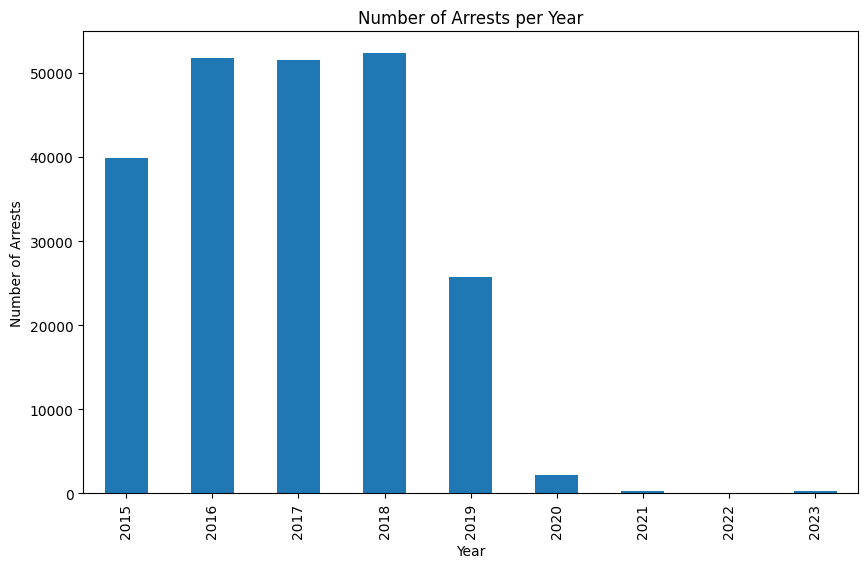

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Resources/Crimes_2015toPresent.csv')
data['Year'] = pd.to_datetime(data['Date']).dt.year

# Count number of TRUE rows in Arrests column and group them per year
arrests_per_year = data[data['Arrest'] == True].groupby('Year').size()

arrests_per_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.title('Number of Arrests per Year')
plt.show()

In [4]:
top_10_common_description = data['Description'].value_counts().head(10)

print(top_10_common_description)

Description
SIMPLE                          49963
$500 AND UNDER                  46301
DOMESTIC BATTERY SIMPLE         43123
OVER $500                       29938
RETAIL THEFT                    29538
FROM BUILDING                   22155
TO VEHICLE                      19767
TO PROPERTY                     16485
AUTOMOBILE                      16035
POSS: CANNABIS 30GMS OR LESS    12765
Name: count, dtype: int64


In [5]:
data_filtered = data[(data['Year'] >= 2015) & (data['Year'] <= 2022)]

# Filter data where Arrests is True
data_arrests_true = data_filtered[data_filtered['Arrest'] == True]

# Group data by Year and find top 10 common descriptions for each year
top_10_common_descriptions_per_year = data_arrests_true.groupby('Year')['Description'].value_counts().groupby(level=0).head(10)

print(top_10_common_descriptions_per_year)

Year  Description                            
2015  POSS: CANNABIS 30GMS OR LESS               5476
      DOMESTIC BATTERY SIMPLE                    3528
      SIMPLE                                     3163
      RETAIL THEFT                               2998
      POSS: HEROIN(WHITE)                        2079
                                                 ... 
2022  MANUFACTURE / DELIVER -  HEROIN (WHITE)       3
      POSSESS - METHAMPHETAMINE                     3
      AGGRAVATED VEHICULAR HIJACKING                1
      MANUFACTURE / DELIVER - BARBITURATES          1
      AUTOMOBILE                                    1
Name: count, Length: 80, dtype: int64


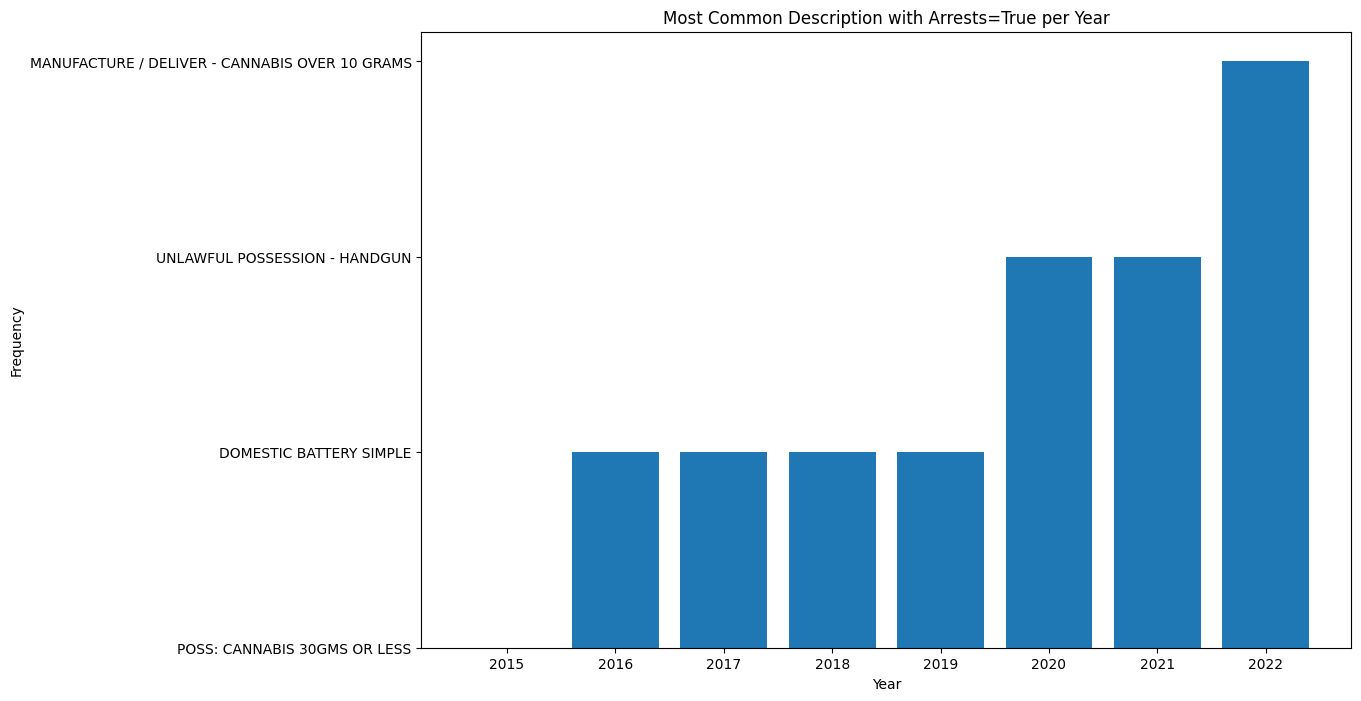

In [6]:

data_filtered = data[(data['Year'] >= 2015) & (data['Year'] <= 2022)]

# Filter data where Arrests is True
data_arrests_true = data_filtered[data_filtered['Arrest'] == True]

# Find the most common description for each year
most_common_description_per_year = data_arrests_true.groupby('Year')['Description'].apply(lambda x: x.value_counts().idxmax()).reset_index()

# Plot the graph
plt.figure(figsize=(12, 8))
plt.bar(most_common_description_per_year['Year'], most_common_description_per_year['Description'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Most Common Description with Arrests=True per Year')
plt.xticks(most_common_description_per_year['Year'])
plt.show()


In [19]:
data_filtered = data[(data['Year'] >= 2015) & (data['Year'] <= 2022)]

# Filter data where Arrests is True
data_arrests_true = data_filtered[data_filtered['Arrest'] == True]

# Find the most common description for each year
most_common_description_per_year = data_arrests_true.groupby('Year')['Description'].apply(lambda x: x.value_counts().idxmax()).reset_index()

most_common_description_per_year

,Year,Description
0,2015,POSS: CANNABIS 30GMS OR LESS
1,2016,DOMESTIC BATTERY SIMPLE
2,2017,DOMESTIC BATTERY SIMPLE
3,2018,DOMESTIC BATTERY SIMPLE
4,2019,DOMESTIC BATTERY SIMPLE
5,2020,UNLAWFUL POSSESSION - HANDGUN
6,2021,UNLAWFUL POSSESSION - HANDGUN
7,2022,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS


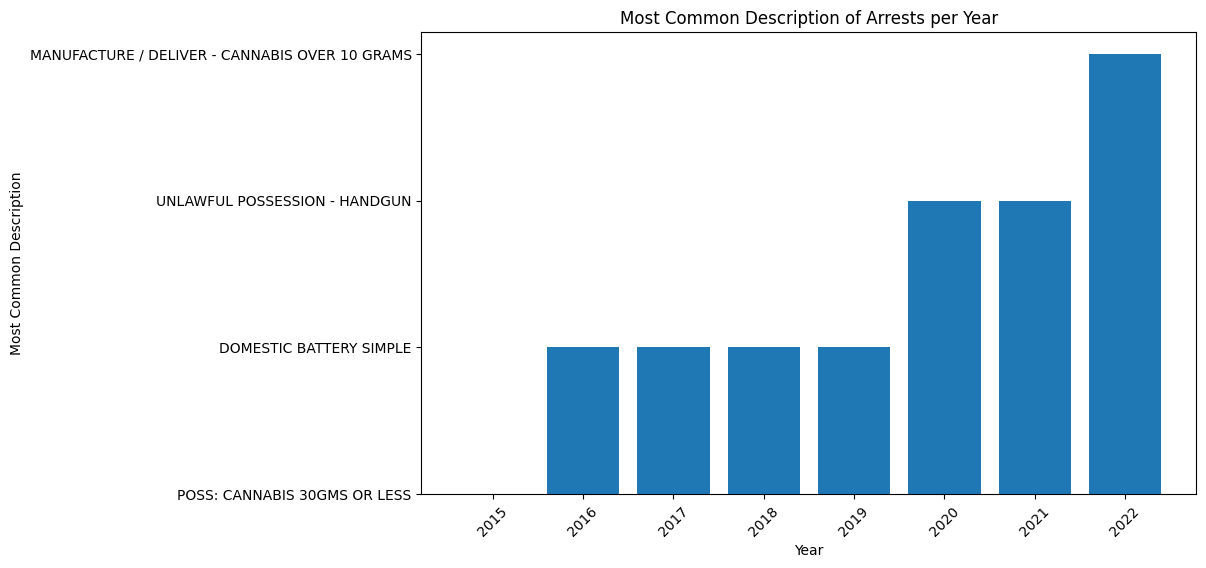

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the most common description for each year
most_common_description_per_year = data_arrests_true.groupby('Year')['Description'].apply(lambda x: x.value_counts().idxmax()).reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))
plt.bar(most_common_description_per_year['Year'], most_common_description_per_year['Description'])
plt.xlabel('Year')
plt.ylabel('Most Common Description')
plt.title('Most Common Description of Arrests per Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [23]:
# Most common district overall
most_common_district = data['District'].value_counts().idxmax()

# Filter data where Arrests is True
data_arrests_true = data[data['Arrest'] == True]

# Most common district with Arrests as True
most_common_district_arrests_true = data_arrests_true['District'].value_counts().idxmax()

print("Highest Recorded Crime Distict:", most_common_district)
print("District that ends the most in Arrest:", most_common_district_arrests_true)

Highest Recorded Crime Distict: 25.0
District that ends the most in Arrest: 11.0


In [11]:
filtered_data = data[(data['Arrest'] == True) & (data['District'] == 25)]

# Get the description
description = filtered_data['Description'].values[0]

print("Description with Arrests=True and District=25:", description)

Description with Arrests=True and District=25: SIMPLE


In [12]:
data_filtered = data[data['Description'] != 'SIMPLE']

# Filter data where Arrests is True and District is 25
filtered_data = data_filtered[(data_filtered['Arrest'] == True) & (data_filtered['District'] == 25)]

# Get the description
description = filtered_data['Description'].values[0]

print("Description with Arrests=True, District=25, and no SIMPLE description:", description)

Description with Arrests=True, District=25, and no SIMPLE description: POSS: HEROIN(WHITE)


In [24]:
filtered_data = data[(data['Arrest'] == True) & (data['District'] == 11)]

# Get the description
description = filtered_data['Description'].values[0]

print("Most Common Cause of Arrest in District 11:", description)

Most Common Cause of Arrest in District 11: VEHICLE TITLE/REG OFFENSE


In [25]:
filtered_data = data[(data['Arrest'] == True) & (data['District'] == 11)]
num_arrests = len(filtered_data)

print("Overall Number of Arrests in District 11:", num_arrests)


Overall Number of Arrests in District 11: 28796


In [26]:
filtered_data = data[(data['Arrest'] == True) & (data['District'] == 11)]

# Get the most common cause of arrest
most_common_cause = filtered_data['Description'].value_counts().idxmax()

# Filter the data based on the most common cause of arrest
arrests_with_most_common_cause = filtered_data[filtered_data['Description'] == most_common_cause]

# Get the count of arrests with the most common cause
num_arrests_with_most_common_cause = len(arrests_with_most_common_cause)

print("Number of Arrests with the Most Common Cause in District 11:", num_arrests_with_most_common_cause)

Number of Arrests with the Most Common Cause in District 11: 4452


In [27]:
# Filter data for arrests in District 11
filtered_data = data[(data['Arrest'] == True) & (data['District'] == 11)]

# Get the top 7 most common causes for arrest
top_causes = filtered_data['Description'].value_counts().head(7)

print("Top 7 Most Common Causes for Arrest in District 11:")
print(top_causes)

Top 7 Most Common Causes for Arrest in District 11:
Description
POSS: HEROIN(WHITE)             4452
MANU/DELIVER: HEROIN (WHITE)    2495
POSS: CANNABIS 30GMS OR LESS    1997
POSS: CRACK                     1618
SOLICIT ON PUBLIC WAY           1567
UNLAWFUL POSS OF HANDGUN        1395
DOMESTIC BATTERY SIMPLE         1256
Name: count, dtype: int64


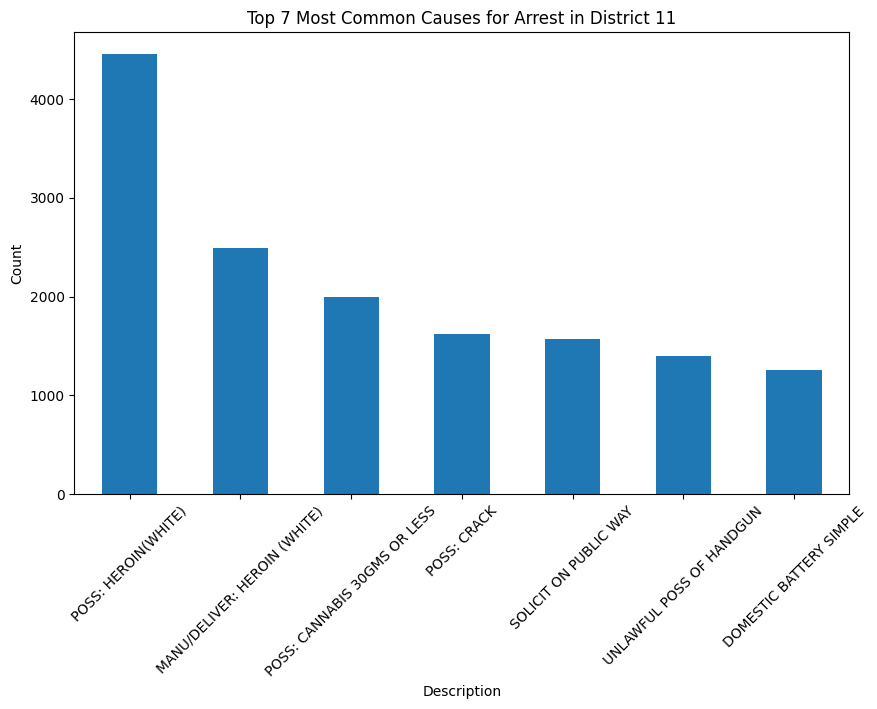

In [28]:
import matplotlib.pyplot as plt

# Filter data for arrests in District 11
filtered_data = data[(data['Arrest'] == True) & (data['District'] == 11)]

# Get the top 7 most common causes for arrest
top_causes = filtered_data['Description'].value_counts().head(7)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_causes.plot(kind='bar')
plt.title('Top 7 Most Common Causes for Arrest in District 11')
plt.xlabel('Description')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [29]:
# Filter data for the description "POSS: HEROIN(WHITE)"
filtered_data = data[data['Description'] == 'POSS: HEROIN(WHITE)']

# Get the district with the highest value count
highest_count_district = filtered_data['District'].value_counts().idxmax()

print("District with the Highest Value Count for 'POSS: HEROIN(WHITE)':", highest_count_district)


District with the Highest Value Count for 'POSS: HEROIN(WHITE)': 11.0


In [31]:
# Filter out District 31 from the data
filtered_data = data[data['District'] != 31]

# Group the data by district and count the number of arrests
arrest_counts = filtered_data[filtered_data['Arrest'] == True]['District'].value_counts()

# Find the district with the least number of arrests
district_with_least_arrests = arrest_counts.idxmin()

print("District with the Least Number of Arrests (excluding District 31):", district_with_least_arrests)


District with the Least Number of Arrests (excluding District 31): 20.0


In [32]:
# Filter data for arrests in District 20
filtered_data = data[(data['Arrest'] == True) & (data['District'] == 20)]

# Get the most common cause of arrest
most_common_cause = filtered_data['Description'].value_counts().idxmax()

print("Most Common Cause of Arrest in District 20:", most_common_cause)

Most Common Cause of Arrest in District 20: RETAIL THEFT


In [33]:
# Filter data for arrests in District 20
filtered_data = data[(data['Arrest'] == True) & (data['District'] == 20)]

# Get the top 7 causes for arrest
top_causes = filtered_data['Description'].value_counts().head(7)

print("Top 7 Causes for Arrest in District 20:")
print(top_causes)

Top 7 Causes for Arrest in District 20:
Description
RETAIL THEFT                    485
SIMPLE                          474
DOMESTIC BATTERY SIMPLE         283
TO LAND                         197
POSS: CANNABIS 30GMS OR LESS    119
$500 AND UNDER                   85
TO PROPERTY                      66
Name: count, dtype: int64


In [35]:
# District 31 is an outlier
filtered_data = data[data['District'] != 31]

# Count the number of rows for each district
district_counts = filtered_data['District'].value_counts()

# Find the district with the fewest number of rows
safest_district = district_counts.idxmin()

print("Safest District (Fewest Number of Rows):", safest_district)


Safest District (Fewest Number of Rows): 17.0


In [36]:
# Filter data for District 17
filtered_data = data[data['District'] == 17]

# Get the top 7 most counted descriptions
top_descriptions = filtered_data['Description'].value_counts().head(7)

print("Top 7 Most Counted Descriptions in District 17:")
print(top_descriptions)

Top 7 Most Counted Descriptions in District 17:
Description
SIMPLE                            2166
DOMESTIC BATTERY SIMPLE           1297
RETAIL THEFT                       679
AGGRAVATED: HANDGUN                299
POSS: CANNABIS 30GMS OR LESS       196
AGGRAVATED: OTHER DANG WEAPON      195
AGGRAVATED:KNIFE/CUTTING INSTR     184
Name: count, dtype: int64


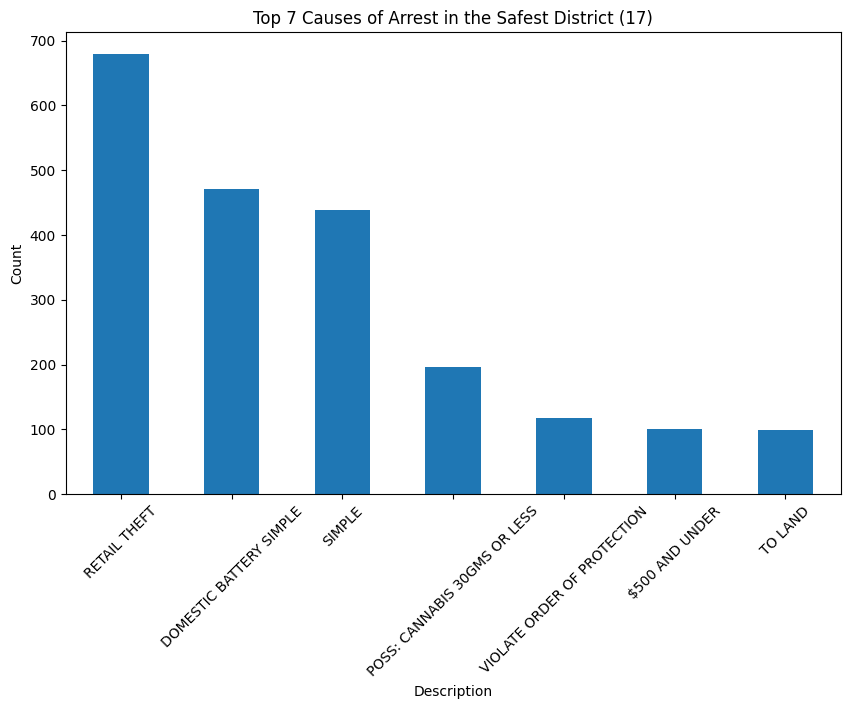

In [41]:
# Filter data for Arrest == True and District 17
filtered_data = data[(data['Arrest'] == True) & (data['District'] == 17)]

# Get the top 7 descriptions by count
top_descriptions = filtered_data['Description'].value_counts().head(7)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_descriptions.plot(kind='bar')
plt.xlabel('Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Top 7 Causes of Arrest in the Safest District (17)')

plt.show()